In [1]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

In [18]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "useducation"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from {}".format(postgres_db), con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [5]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


<IPython.core.display.Javascript object>

In [6]:
fill_list = [
    "ENROLL",
    "TOTAL_REVENUE",
    "FEDERAL_REVENUE",
    "STATE_REVENUE",
    "LOCAL_REVENUE",
    "TOTAL_EXPENDITURE",
    "INSTRUCTION_EXPENDITURE",
    "SUPPORT_SERVICES_EXPENDITURE",
    "OTHER_EXPENDITURE",
    "CAPITAL_OUTLAY_EXPENDITURE",
    "GRADES_PK_G",
    "GRADES_KG_G",
    "GRADES_4_G",
    "GRADES_8_G",
    "GRADES_12_G",
    "GRADES_1_8_G",
    "GRADES_9_12_G",
    "GRADES_ALL_G",
]

<IPython.core.display.Javascript object>

In [8]:
fill_df = df.copy()

for col in fill_list:
    fill_df.loc[:, col] = fill_df.loc[:, col].interpolate()

<IPython.core.display.Javascript object>

In [13]:
fill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1456 non-null   float64
 4   TOTAL_REVENUE                 1492 non-null   float64
 5   FEDERAL_REVENUE               1492 non-null   float64
 6   STATE_REVENUE                 1492 non-null   float64
 7   LOCAL_REVENUE                 1492 non-null   float64
 8   TOTAL_EXPENDITURE             1492 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1492 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1492 non-null   float64
 11  OTHER_EXPENDITURE             1456 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1492 non-null   float64
 13  GRA

<IPython.core.display.Javascript object>

In [14]:
fill_df = fill_df[fill_df.columns[:-4]].dropna()

<IPython.core.display.Javascript object>

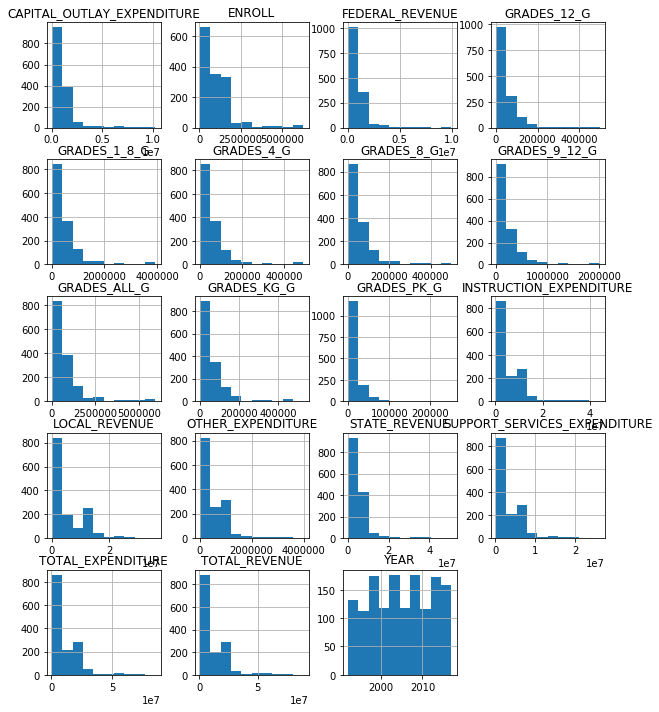

<IPython.core.display.Javascript object>

In [20]:
fill_df.hist(figsize=(10, 12))
plt.show()

In [21]:
fill_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1456.000000,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1.456000e+03,1.456000e+03
mean,2004.741071,1.005984e+06,1.126751e+07,9.066394e+05,4.979950e+06,5.380917e+06,1.129846e+07,5.871507e+06,3.370642e+06,5.004288e+05,1.049006e+06,16090.780563,58814.621566,59623.456044,59442.627747,50251.597527,4.796928e+05,2.286544e+05,7.472629e+05
std,7.218313,1.009158e+06,1.207573e+07,1.114991e+06,5.453728e+06,5.939856e+06,1.219924e+07,6.415787e+06,3.520831e+06,5.253843e+05,1.282479e+06,28935.570975,78272.187894,78481.925433,77360.808108,66653.453664,6.294572e+05,3.016698e+05,9.308698e+05
min,1992.000000,4.386600e+04,4.656500e+05,3.171400e+04,0.000000e+00,2.391700e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03
25%,1999.000000,2.973995e+05,2.598676e+06,2.250838e+05,1.382799e+06,9.652915e+05,2.577423e+06,1.365708e+06,7.810895e+05,1.279618e+05,2.245848e+05,1547.000000,9862.500000,10052.750000,10088.000000,8815.750000,8.042375e+04,3.910525e+04,1.710098e+05
50%,2005.000000,7.540845e+05,6.575628e+06,5.308690e+05,3.196920e+06,2.742262e+06,6.650688e+06,3.427804e+06,1.965748e+06,3.415810e+05,6.632450e+05,5953.000000,38377.000000,38144.800000,38060.500000,33211.500000,3.080685e+05,1.466290e+05,4.585625e+05
75%,2011.000000,1.595024e+06,1.853620e+07,1.447408e+06,8.288798e+06,8.838075e+06,1.859778e+07,9.406610e+06,5.682262e+06,8.490842e+05,1.775732e+06,19809.500000,70679.000000,72258.250000,72515.000000,65308.750000,5.771392e+05,2.843505e+05,8.860948e+05
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,530531.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06


<IPython.core.display.Javascript object>

In [26]:
ca_df = fill_df[fill_df["STATE"] == "CALIFORNIA"]

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(*args, **kw)>

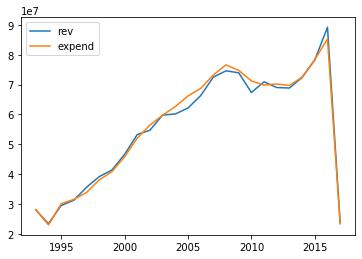

<IPython.core.display.Javascript object>

In [45]:
plt.plot(ca_df["YEAR"], ca_df[["TOTAL_REVENUE","TOTAL_EXPENDITURE"]])
#plt.plot(ca_df["YEAR"], ca_df["TOTAL_EXPENDITURE"], label = 'expend')

plt.legend(['rev', 'expend'])
plt.show


The drop in 2008 is pretty clearly the housing market crash of 2008
Massive drop in 2017 is probably due to incomplete data

In [38]:
ca_df[["TOTAL_EXPENDITURE", "TOTAL_REVENUE", "YEAR"]].sort_values(
    by="YEAR", ascending=False
)

,TOTAL_EXPENDITURE,TOTAL_REVENUE,YEAR
1451,23352516.0,23766529.0,2017
1254,85320133.0,89217262.0,2016
1203,78365958.0,78248042.0,2015
1152,72506810.0,72389126.0,2014
1101,69727119.0,68868516.0,2013
1048,70191877.0,69016392.0,2012
997,69847705.0,70953331.0,2011
944,71227111.0,67356719.0,2010
891,74766086.0,73958896.0,2009
836,76618865.0,74626928.0,2008


<IPython.core.display.Javascript object>

In [47]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 56 to 1451
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   25 non-null     object 
 1   STATE                         25 non-null     object 
 2   YEAR                          25 non-null     int64  
 3   ENROLL                        25 non-null     float64
 4   TOTAL_REVENUE                 25 non-null     float64
 5   FEDERAL_REVENUE               25 non-null     float64
 6   STATE_REVENUE                 25 non-null     float64
 7   LOCAL_REVENUE                 25 non-null     float64
 8   TOTAL_EXPENDITURE             25 non-null     float64
 9   INSTRUCTION_EXPENDITURE       25 non-null     float64
 10  SUPPORT_SERVICES_EXPENDITURE  25 non-null     float64
 11  OTHER_EXPENDITURE             25 non-null     float64
 12  CAPITAL_OUTLAY_EXPENDITURE    25 non-null     float64
 13  GRAD

<IPython.core.display.Javascript object>

In [58]:
ca_scores = df[df["STATE"] == "CALIFORNIA"]

<IPython.core.display.Javascript object>

In [51]:
#ca_scores = ca_scores[ca_scores.columns[-4:]]

<IPython.core.display.Javascript object>

In [57]:
ca_df.shape

(25, 21)

<IPython.core.display.Javascript object>

In [61]:
ca_full = pd.merge(ca_df, ca_scores, how="inner", right_index=True, left_index=True)

<IPython.core.display.Javascript object>

In [63]:
ca_full[ca_full.columns[-4:]].describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,10.000000,10.000000,10.000000,10.000000
mean,227.385691,270.201543,209.026260,261.902652
std,8.724144,5.155037,4.095743,4.861743
min,209.129083,262.171027,201.912591,254.895247
25%,228.099759,267.426658,206.065447,259.188273
50%,230.958151,270.415186,209.142296,261.902941
75%,232.115938,274.685881,212.249135,264.416677
max,234.164993,276.638200,215.421814,269.197451


<IPython.core.display.Javascript object>

Looks like math

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001984F876588>,
      dtype=object)

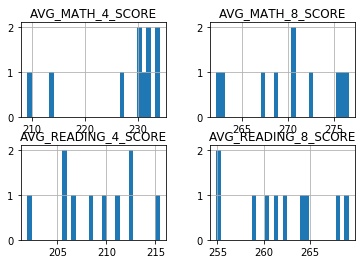

<IPython.core.display.Javascript object>

In [67]:
ca_full[ca_full.columns[-4:]].hist(bins=30)

In [71]:
ca_full_mean = ca_full.copy()
for col in ca_full.columns[-4:]:
    ca_full_mean[col] = ca_full_mean[col].fillna(ca_full[col].mean())

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001984FE020C8>,
      dtype=object)

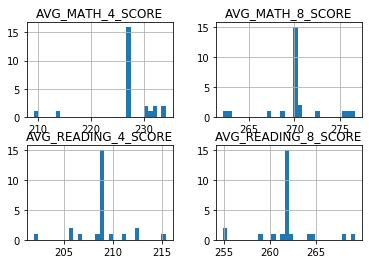

<IPython.core.display.Javascript object>

In [72]:
ca_full_mean[ca_full_mean.columns[-4:]].hist(bins=30)

In [77]:
ca_full_median = ca_full.copy()
for col in ca_full.columns[-4:]:
    ca_full_median[col] = ca_full_median[col].fillna(ca_full[col].median())

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001984FAAA988>,
      dtype=object)

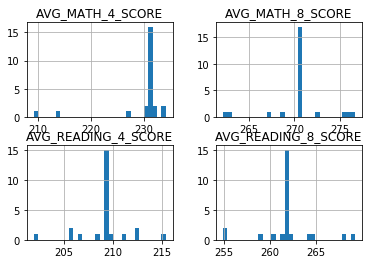

<IPython.core.display.Javascript object>

In [78]:
ca_full_median[ca_full_median.columns[-4:]].hist(bins=30)

In [79]:
ca_full_interp = ca_full.copy()
for col in ca_full.columns[-4:]:

    ca_full_interp.loc[:, col] = ca_full_interp.loc[:, col].interpolate()

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001984FC49F48>,
      dtype=object)

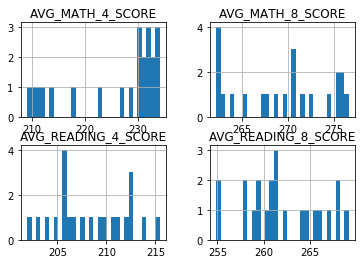

<IPython.core.display.Javascript object>

In [80]:
ca_full_interp[ca_full_interp.columns[-4:]].hist(bins=30)

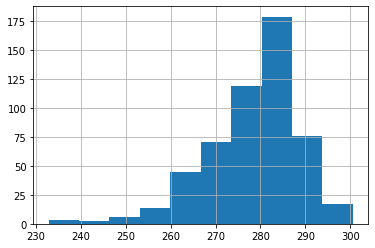

<IPython.core.display.Javascript object>

In [81]:
df["AVG_MATH_8_SCORE"].dropna().hist()